# Learning from the disaster

**Business case** : Ana is the Manager of LA Vanguardia, a newspaper with the main offices in Barcelona. She has come to us because John (our superstar client) has recommended us due to our robust and throughout methodology. 

    Last survivor from Titanic passed away some days ago, and La Vanguardia is interested in creating a new post on its website. Ana has contacted us because they have found for the first time a document in which they have information about some passengers but the gender of these people has been lost. In order to create the article and try to predict the gender to be able to make an article that captures the interest of the population.

For our peace of mind, we have been given a file which contains a list of some of the passengers, including gender.

    datasets for the model building: `Ex4.2.titanic_train.csv`and `Ex4.2.titanic_unknown.csv`

**Meet the dataset**

Get to know your data by first name and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals in life (dependent/target variable(s)). Think of it like a first date, before you jump in and start poking it in the bedroom.

To begin this step, you should first import our data. Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). 

- The `Survived` is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
    
- The `PassengerID` and `Ticket` variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

- The `Pclass` variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.

- The `Name` variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.

- The `Sex` and `Embarked` variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.

- The `Age` and `Fare` variable are continuous quantitative datatypes.

- The `SibSp` represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.

- The `Cabin` variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

# Import libraries and the data

In [163]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train = pd.read_csv("../../datasets/Students_turn/Ex4.2.titanic_train.csv")
titanic_unknown = pd.read_csv("../../datasets/Students_turn/Ex4.2.titanic_unknown.csv")

In [10]:
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
titanic_unknown.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

## Train data

In [4]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#checking for duplicates

titanic_train.duplicated().sum()

0

In [6]:
def percentage_nullValues(data):
    """
    Function to calculate % missing values on a dataset
    """
    null_perc = round(data.isnull().sum() / data.shape[0],3) * 100.00
    null_perc = pd.DataFrame(null_perc, columns=['Percentage_NaN'])
    null_perc= null_perc.sort_values(by = ['Percentage_NaN'], ascending = False)
    return null_perc

In [9]:
# checking for missing values
percentage_nullValues(titanic_train)

Percentage_NaN
Cabin                  77.1
Age                    19.9
Embarked                0.2
PassengerId             0.0
Survived                0.0
Pclass                  0.0
Name                    0.0
Sex                     0.0
SibSp                   0.0
Parch                   0.0
Ticket                  0.0
Fare                    0.0

In [12]:
#dropping columns we dont need or have too many missing values

titanic_train = titanic_train.drop(["PassengerId", "Ticket", "Cabin","Name"],axis=1)
titanic_train

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [13]:
#checking again
percentage_nullValues(titanic_train)

Percentage_NaN
Age                 19.9
Embarked             0.2
Survived             0.0
Pclass               0.0
Sex                  0.0
SibSp                0.0
Parch                0.0
Fare                 0.0

In [21]:
# Filling NAs in Age column with mean

titanic_train["Age"] = titanic_train["Age"].fillna(titanic_train["Age"].mean())

In [24]:
# filling NAs in Embarked column with the mode 

titanic_train["Embarked"] = titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0])

In [25]:
#checking again
percentage_nullValues(titanic_train)

Percentage_NaN
Survived             0.0
Pclass               0.0
Sex                  0.0
Age                  0.0
SibSp                0.0
Parch                0.0
Fare                 0.0
Embarked             0.0

In [26]:
# make a function to check outliers

def OutLiersBox(df,nameOfFeature):
    """
    Function to create a BoxPlot and visualise:
    - All Points in the Variable
    - Suspected Outliers in the variable

    """
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all', #define that we want to plot all points
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    
    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers', # define the suspected Outliers
        marker = dict(
            color = 'rgba(219, 64, 82, 0.6)',
            #outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )


    data = [trace0,trace1]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    fig.show()

In [27]:
for item in range(0, len(titanic_train.columns)):
    OutLiersBox(titanic_train, titanic_train.columns[item])

In [28]:
# make a copy before dropping any outliers

titanic_train_copy = titanic_train.copy()

In [30]:
# make a fucntion to check outliers

def outlier_treatment(df, colname):
    """
    Function for dropping Outliers based on the IQR upper and lower boundaries 
    input: df --> dataframe
           colname --> str, name of the column
    
    """
    
    # Calculate the percentiles and the IQR
    Q1,Q3 = np.percentile(df[colname], [25,75])
    IQR = Q3 - Q1
    
    # Calculate the upper and lower limit
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    # Drop the suspected outliers
    df_clean = df[(df[colname] > lower_limit) & (df[colname] < upper_limit)]
    
    print('Shape of the raw data:', df.shape)
    print('..................')
    print('Shape of the cleaned data:', df_clean.shape)
    return df_clean

In [31]:
for item in np.arange(0, len(titanic_train.columns)):
    if titanic_train.iloc[:, item].dtype != 'object':
        print(titanic_train.columns[item])
        if item == 0:
            titanic_train_clean = outlier_treatment(titanic_train, titanic_train.columns[item])
        else:
            titanic_train_clean = outlier_treatment(titanic_train, titanic_train.columns[item])

Survived
Shape of the raw data: (891, 8)
..................
Shape of the cleaned data: (891, 8)
Pclass
Shape of the raw data: (891, 8)
..................
Shape of the cleaned data: (891, 8)
Age
Shape of the raw data: (891, 8)
..................
Shape of the cleaned data: (825, 8)
SibSp
Shape of the raw data: (891, 8)
..................
Shape of the cleaned data: (845, 8)
Parch
Shape of the raw data: (891, 8)
..................
Shape of the cleaned data: (0, 8)
Fare
Shape of the raw data: (891, 8)
..................
Shape of the cleaned data: (775, 8)


In [32]:
titanic_train_clean

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
5           0       3    male  29.699118      0      0   8.4583        Q
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[775 rows x 8 columns]

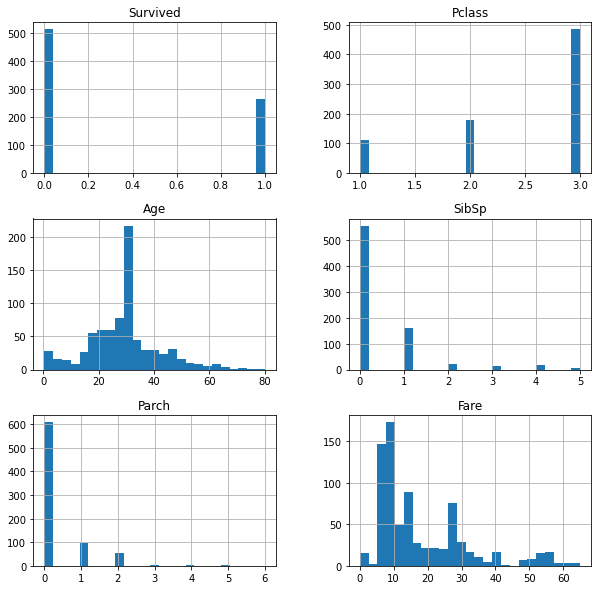

In [33]:
# visualise the distributions

titanic_train_clean.hist(bins=25,figsize=(10,10))
plt.show()

## Unknown data

In [34]:
titanic_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
titanic_unknown.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
titanic_unknown.duplicated().sum()

0

In [37]:
percentage_nullValues(titanic_unknown)

Percentage_NaN
Cabin                  78.2
Age                    20.6
Fare                    0.2
PassengerId             0.0
Pclass                  0.0
Name                    0.0
Sex                     0.0
SibSp                   0.0
Parch                   0.0
Ticket                  0.0
Embarked                0.0

In [38]:
titanic_unknown = titanic_unknown.drop(["PassengerId", "Ticket", "Cabin","Name"],axis=1)
titanic_unknown

Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
413       3    male   NaN      0      0    8.0500        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S
416       3    male   NaN      0      0    8.0500        S
417       3    male   NaN      1      1   22.3583        C

[418 rows x 7 columns]

In [39]:
percentage_nullValues(titanic_unknown)

Percentage_NaN
Age                 20.6
Fare                 0.2
Pclass               0.0
Sex                  0.0
SibSp                0.0
Parch                0.0
Embarked             0.0

In [40]:
# fill NAs with mean

titanic_unknown["Age"] = titanic_unknown["Age"].fillna(titanic_unknown["Age"].mean())
titanic_unknown["Fare"] = titanic_unknown["Fare"].fillna(titanic_unknown["Fare"].mean())

In [41]:
#always double check
percentage_nullValues(titanic_unknown)

Percentage_NaN
Pclass               0.0
Sex                  0.0
Age                  0.0
SibSp                0.0
Parch                0.0
Fare                 0.0
Embarked             0.0

In [42]:
#check for outliers 

for item in range(0, len(titanic_unknown.columns)):
    OutLiersBox(titanic_unknown, titanic_unknown.columns[item])

In [43]:
titanic_unknown_copy = titanic_unknown.copy()

In [44]:
for item in np.arange(0, len(titanic_unknown.columns)):
    if titanic_unknown.iloc[:, item].dtype != 'object':
        print(titanic_train.columns[item])
        if item == 0:
            titanic_unknown_clean = outlier_treatment(titanic_unknown, titanic_unknown.columns[item])
        else:
            titanic_unknown_clean = outlier_treatment(titanic_unknown, titanic_unknown.columns[item])

Survived
Shape of the raw data: (418, 7)
..................
Shape of the cleaned data: (418, 7)
Sex
Shape of the raw data: (418, 7)
..................
Shape of the cleaned data: (382, 7)
Age
Shape of the raw data: (418, 7)
..................
Shape of the cleaned data: (407, 7)
SibSp
Shape of the raw data: (418, 7)
..................
Shape of the cleaned data: (0, 7)
Parch
Shape of the raw data: (418, 7)
..................
Shape of the cleaned data: (363, 7)


In [45]:
titanic_unknown_clean

Pclass     Sex       Age  SibSp  Parch     Fare Embarked
0         3    male  34.50000      0      0   7.8292        Q
1         3  female  47.00000      1      0   7.0000        S
2         2    male  62.00000      0      0   9.6875        Q
3         3    male  27.00000      0      0   8.6625        S
4         3  female  22.00000      1      1  12.2875        S
..      ...     ...       ...    ...    ...      ...      ...
412       3  female  28.00000      0      0   7.7750        S
413       3    male  30.27259      0      0   8.0500        S
415       3    male  38.50000      0      0   7.2500        S
416       3    male  30.27259      0      0   8.0500        S
417       3    male  30.27259      1      1  22.3583        C

[363 rows x 7 columns]

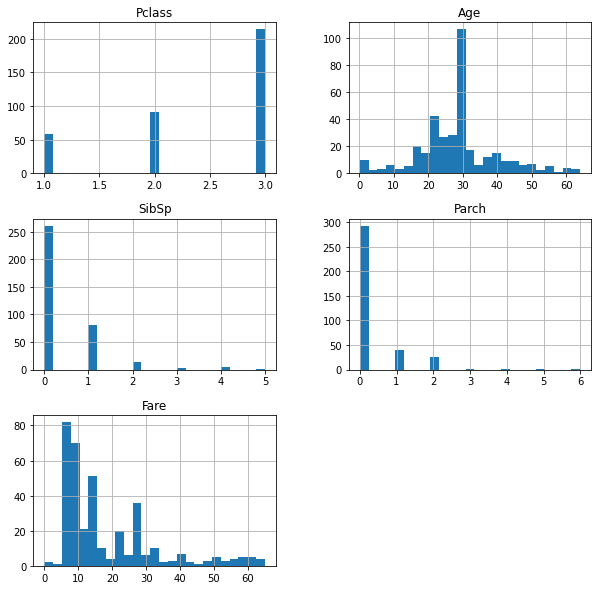

In [46]:
#histograms
titanic_unknown_clean.hist(bins=25,figsize=(10,10))
plt.show()

# EDA

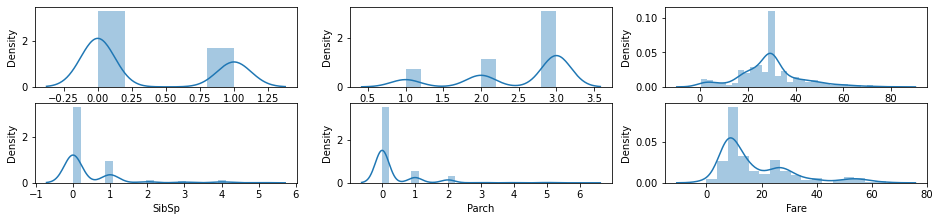

In [53]:
#checking distribution for train data

data_columns = titanic_train_clean._get_numeric_data().columns.values
plot_columns = 3
number_of_columns = math.ceil(len(data_columns) / plot_columns)
number_of_rows = math.ceil((len(data_columns)) / number_of_columns)
plt.figure(figsize=(16, 5))
# plot distribution
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i + 1)
    sns.distplot(titanic_train_clean[data_columns[i]], kde=True)

In [54]:
#check skewness for train data

titanic_train_clean.skew()

Survived    0.679874
Pclass     -1.029597
Age         0.435012
SibSp       2.790689
Parch       3.145571
Fare        1.430672
dtype: float64

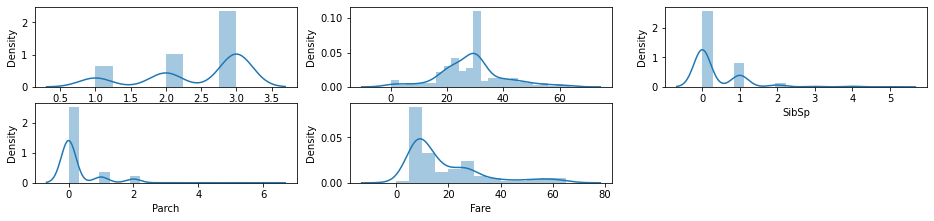

In [55]:
#check distribution for test data 

data_columns = titanic_unknown_clean._get_numeric_data().columns.values
plot_columns = 3
number_of_columns = math.ceil(len(data_columns) / plot_columns)
number_of_rows = math.ceil((len(data_columns)) / number_of_columns)
plt.figure(figsize=(16, 5))
# plot distribution
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i + 1)
    sns.distplot(titanic_unknown_clean[data_columns[i]], kde=True)

In [57]:
#check for skewness on test data
titanic_unknown_clean.skew()

Pclass   -0.893615
Age       0.316123
SibSp     2.789793
Parch     3.406727
Fare      1.578135
dtype: float64

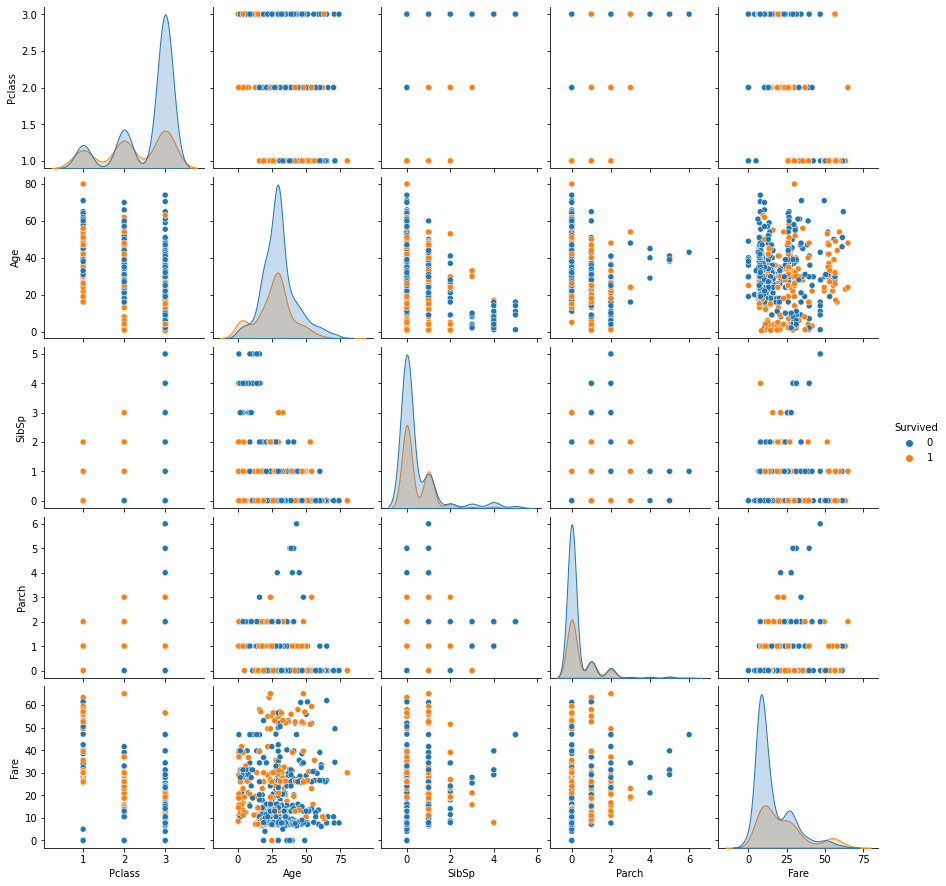

In [56]:
#check for relantiships between variables 

sns.pairplot(titanic_train_clean, hue="Survived")

Text(0.5, 1.0, 'Correlation Heatmap')

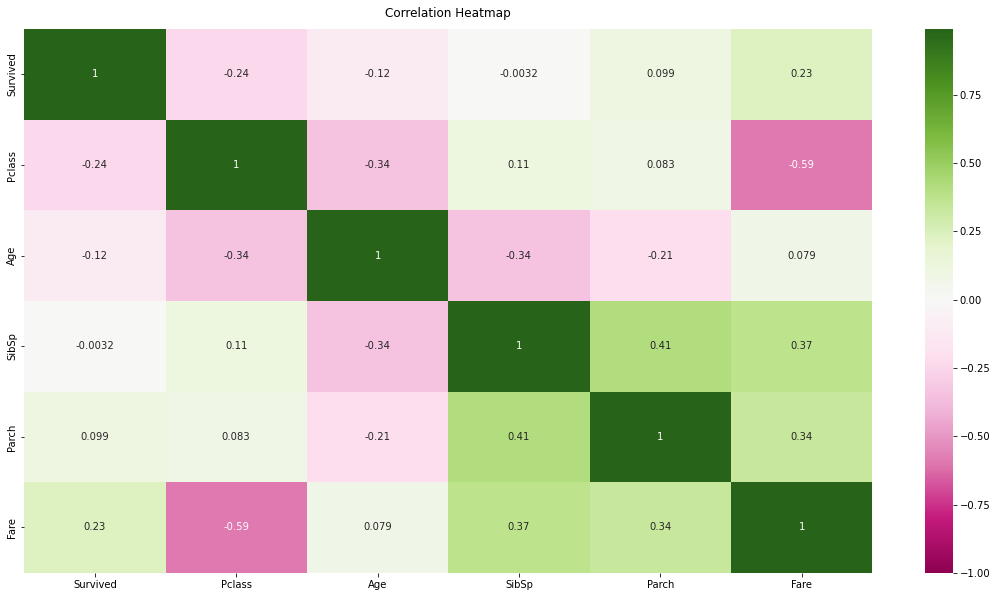

In [58]:
# check for correlation between variables 

plt.figure(figsize=(19, 10))
heatmap = sns.heatmap(titanic_train_clean.corr(),
                      vmin=-1,
                      vmax=0.99,
                      annot=True,
                      cmap='PiYG')
heatmap.set_title('Correlation Heatmap',
                  fontdict={'fontsize': 12},
                  pad=12)

# Feature engineering

## Train

In [59]:
titanic_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 70.7+ KB


### Encoding categoricals

In [60]:
titanic_train_clean_dum = pd.get_dummies(titanic_train_clean, 
                                       columns=['Sex',"Embarked"],)

In [61]:
titanic_train_clean_dum

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.000000      1      0   7.2500           0         1   
2           1       3  26.000000      0      0   7.9250           1         0   
3           1       1  35.000000      1      0  53.1000           1         0   
4           0       3  35.000000      0      0   8.0500           0         1   
5           0       3  29.699118      0      0   8.4583           0         1   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886         0       2  27.000000      0      0  13.0000           0         1   
887         1       1  19.000000      0      0  30.0000           1         0   
888         0       3  29.699118      1      2  23.4500           1         0   
889         1       1  26.000000      0      0  30.0000           0         1   
890         0       3  32.000000      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
2             0           0           1  
3             0           0           1  
4             0           0           1  
5             0           1           0  
..          ...         ...         ...  
886           0           0           1  
887           0           0           1  
888           0           0           1  
889           1           0           0  
890           0           1           0  

[775 rows x 11 columns]

In [62]:
titanic_train_clean_dum.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [63]:
type(titanic_train_clean_dum)

pandas.core.frame.DataFrame

### Feature scaling

In [64]:
df_to_scale = titanic_train_clean_dum[['Age','Fare']]

df_to_scale #scale numerical values - not encoded

Age     Fare
0    22.000000   7.2500
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
5    29.699118   8.4583
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[775 rows x 2 columns]

In [65]:
scaler = StandardScaler()

dfname = df_to_scale.columns

data_Scaled = scaler.fit_transform(df_to_scale)
data_Scaled = pd.DataFrame(data_Scaled, columns=dfname)
data_Scaled.reset_index(drop=True)

Age      Fare
0   -0.556219 -0.779117
1   -0.243027 -0.729373
2    0.461654  2.599828
3    0.461654 -0.720161
4    0.046606 -0.690071
..        ...       ...
770 -0.164729 -0.355367
771 -0.791112  0.897459
772  0.046606  0.414752
773 -0.243027  0.897459
774  0.226760 -0.742269

[775 rows x 2 columns]

In [66]:
# join 
titanic_train_clean_dum = titanic_train_clean_dum.drop(["Age","Fare"], axis=1)
titanic_train_clean_dum.reset_index(drop=True, inplace=True)
titanic_train_clean_dum

Survived  Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
0           0       3      1      0           0         1           0   
1           1       3      0      0           1         0           0   
2           1       1      1      0           1         0           0   
3           0       3      0      0           0         1           0   
4           0       3      0      0           0         1           0   
..        ...     ...    ...    ...         ...       ...         ...   
770         0       2      0      0           0         1           0   
771         1       1      0      0           1         0           0   
772         0       3      1      2           1         0           0   
773         1       1      0      0           0         1           1   
774         0       3      0      0           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           1  
2             0           1  
3             0           1  
4             1           0  
..          ...         ...  
770           0           1  
771           0           1  
772           0           1  
773           0           0  
774           1           0  

[775 rows x 9 columns]

In [67]:
df_train = pd.concat([titanic_train_clean_dum, data_Scaled], axis=1)
df_train



Survived  Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
0           0       3      1      0           0         1           0   
1           1       3      0      0           1         0           0   
2           1       1      1      0           1         0           0   
3           0       3      0      0           0         1           0   
4           0       3      0      0           0         1           0   
..        ...     ...    ...    ...         ...       ...         ...   
770         0       2      0      0           0         1           0   
771         1       1      0      0           1         0           0   
772         0       3      1      2           1         0           0   
773         1       1      0      0           0         1           1   
774         0       3      0      0           0         1           0   

     Embarked_Q  Embarked_S       Age      Fare  
0             0           1 -0.556219 -0.779117  
1             0           1 -0.243027 -0.729373  
2             0           1  0.461654  2.599828  
3             0           1  0.461654 -0.720161  
4             1           0  0.046606 -0.690071  
..          ...         ...       ...       ...  
770           0           1 -0.164729 -0.355367  
771           0           1 -0.791112  0.897459  
772           0           1  0.046606  0.414752  
773           0           0 -0.243027  0.897459  
774           1           0  0.226760 -0.742269  

[775 rows x 11 columns]

## Unknown

In [68]:
titanic_unknown_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    363 non-null    int64  
 1   Sex       363 non-null    object 
 2   Age       363 non-null    float64
 3   SibSp     363 non-null    int64  
 4   Parch     363 non-null    int64  
 5   Fare      363 non-null    float64
 6   Embarked  363 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 22.7+ KB


### Encoding categoricals

In [69]:
titanic_unknown_clean_dum = pd.get_dummies(titanic_unknown_clean, 
                                       columns=['Sex',"Embarked"],)

In [70]:
titanic_unknown_clean_dum

Pclass       Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         3  34.50000      0      0   7.8292           0         1   
1         3  47.00000      1      0   7.0000           1         0   
2         2  62.00000      0      0   9.6875           0         1   
3         3  27.00000      0      0   8.6625           0         1   
4         3  22.00000      1      1  12.2875           1         0   
..      ...       ...    ...    ...      ...         ...       ...   
412       3  28.00000      0      0   7.7750           1         0   
413       3  30.27259      0      0   8.0500           0         1   
415       3  38.50000      0      0   7.2500           0         1   
416       3  30.27259      0      0   8.0500           0         1   
417       3  30.27259      1      1  22.3583           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           1           0  
1             0           0           1  
2             0           1           0  
3             0           0           1  
4             0           0           1  
..          ...         ...         ...  
412           0           0           1  
413           0           0           1  
415           0           0           1  
416           0           0           1  
417           1           0           0  

[363 rows x 10 columns]

In [71]:
titanic_unknown_clean_dum.shape

(363, 10)

### Feature scaling

In [72]:
df_to_scale_ = titanic_unknown_clean_dum[['Age','Fare']]

df_to_scale_

Age     Fare
0    34.50000   7.8292
1    47.00000   7.0000
2    62.00000   9.6875
3    27.00000   8.6625
4    22.00000  12.2875
..        ...      ...
412  28.00000   7.7750
413  30.27259   8.0500
415  38.50000   7.2500
416  30.27259   8.0500
417  30.27259  22.3583

[363 rows x 2 columns]

In [73]:
scaler = StandardScaler()

dfname = df_to_scale.columns

data_Scaled_ = scaler.fit_transform(df_to_scale_)
data_Scaled_ = pd.DataFrame(data_Scaled_, columns=dfname)
data_Scaled_.reset_index(drop=True)

Age      Fare
0    0.507920 -0.729930
1    1.610444 -0.787682
2    2.933473 -0.600505
3   -0.153594 -0.671893
4   -0.594604 -0.419422
..        ...       ...
358 -0.065392 -0.733705
359  0.135055 -0.714552
360  0.860728 -0.770270
361  0.135055 -0.714552
362  0.135055  0.281980

[363 rows x 2 columns]

In [74]:
titanic_unknown_clean_dum_ = titanic_unknown_clean_dum.drop(["Age","Fare"], axis=1)
titanic_unknown_clean_dum_.reset_index(drop=True,inplace=True)

In [75]:
type(titanic_unknown_clean_dum_)

pandas.core.frame.DataFrame

In [76]:
#join
df_unknown = pd.concat([titanic_unknown_clean_dum_, data_Scaled_], axis=1)
df_unknown





Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3      0      0           0         1           0           1   
1         3      1      0           1         0           0           0   
2         2      0      0           0         1           0           1   
3         3      0      0           0         1           0           0   
4         3      1      1           1         0           0           0   
..      ...    ...    ...         ...       ...         ...         ...   
358       3      0      0           1         0           0           0   
359       3      0      0           0         1           0           0   
360       3      0      0           0         1           0           0   
361       3      0      0           0         1           0           0   
362       3      1      1           0         1           1           0   

     Embarked_S       Age      Fare  
0             0  0.507920 -0.729930  
1             1  1.610444 -0.787682  
2             0  2.933473 -0.600505  
3             1 -0.153594 -0.671893  
4             1 -0.594604 -0.419422  
..          ...       ...       ...  
358           1 -0.065392 -0.733705  
359           1  0.135055 -0.714552  
360           1  0.860728 -0.770270  
361           1  0.135055 -0.714552  
362           0  0.135055  0.281980  

[363 rows x 10 columns]

In [77]:
df_train.shape

(775, 11)

In [78]:
df_unknown.shape

(363, 10)

# Dealing with imbalanced data

In [79]:
df_train["Survived"].value_counts()

0    512
1    263
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Survived - Count'}>

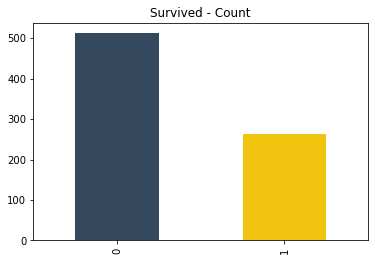

In [80]:
df_train.Survived.value_counts().plot(kind='bar',
                                     color=['#34495E', '#F1C40F'],
                                     title="Survived - Count")

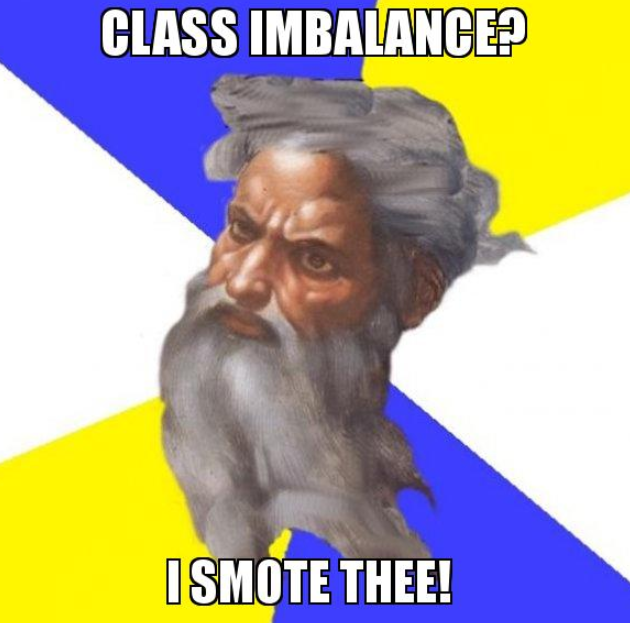

In [81]:
X = df_train.drop('Survived', axis=1)
y = df_train.Survived

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=33)

In [83]:
smote = SMOTE(random_state =33)


In [84]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [85]:
print('\nBefore OVER-sampling\n', y_train.value_counts())
print('\nAfter OVER-sampling\n', y_sm.value_counts())


Before OVER-sampling
 0    339
1    180
Name: Survived, dtype: int64

After OVER-sampling
 1    339
0    339
Name: Survived, dtype: int64


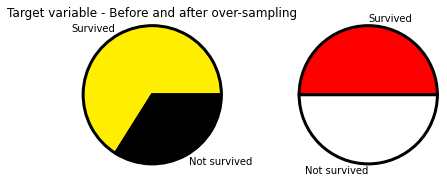

In [86]:
fig = plt.figure()

labels = "Survived", "Not survived"

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(y.value_counts(),
        labels=labels,
        radius=1.2,
        colors=["#FFEE00", "black"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 3,
            'linestyle': 'solid',
            'antialiased': True
        })
ax1.title.set_text('Target variable - Before and after over-sampling')
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(y_sm.value_counts(),
        labels=labels,
        radius=1.2,
        colors=["red", "white"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 3,
            'linestyle': 'solid',
            'antialiased': True
        })
plt.show()

#see what I did below? :D 

# Machine learning

In [87]:
# make a function to instantiate various models to compare

def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('SVM'  , SVC()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    return basedModels

In [88]:
# make a function to train all the models from GetBasedModels

def BasedModels(X_train, y_train,scoring, models):
    # Test options and evaluation metric
    num_folds = 10
    
    scoring = scoring

    results = []
    names = []
    
    for name, model in models:
        cv_results = cross_val_score(model, X_train,
                                     y_train, cv=num_folds, scoring=scoring)
        results.append(cv_results.mean())
        names.append(name)
        msg = "%s: %s = %f (std = %f)" % (name, scoring,
                                                cv_results.mean(), 
                                                cv_results.std())
        print(msg)
    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': results})    
    return scoreDataFrame

In [95]:
models = GetBasedModel()

In [98]:
Base_model_AUC = BasedModels(X_sm, y_sm, 'roc_auc', models)

LR: roc_auc = 0.858804 (std = 0.037927)
KNN: roc_auc = 0.877514 (std = 0.036450)
CART: roc_auc = 0.805989 (std = 0.050633)
SVM: roc_auc = 0.877958 (std = 0.039540)
RF: roc_auc = 0.897654 (std = 0.033065)


In [99]:
Base_model_f1 = BasedModels(X_sm, y_sm, 'f1', models)

LR: f1 = 0.812501 (std = 0.042784)
KNN: f1 = 0.829699 (std = 0.036002)
CART: f1 = 0.812495 (std = 0.053474)
SVM: f1 = 0.798241 (std = 0.064118)
RF: f1 = 0.834183 (std = 0.038343)


## Random Forest

In [100]:
rand_forest = RandomForestClassifier(n_estimators=10, random_state=33)
rand_forest.fit(X_sm, y_sm)

RandomForestClassifier(n_estimators=10, random_state=33)

In [101]:
y_pred_RF = rand_forest.predict(X_test)
y_pred_RF

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [104]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       173
           1       0.63      0.53      0.58        83

    accuracy                           0.75       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.74      0.75      0.74       256



In [113]:
# make a function to get all the metrics

def Clf_metrics(model,X_train,y_train,X_test,y_test):
    
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
    
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    ypredTrain = model.predict(X_train)
    Acc_train = scores['test_acc'].mean()
    Precision_train = scores['test_prec_macro'].mean()
    Recall_train = scores['test_rec_macro'].mean()
    F1_train = scores['test_f1_macro'].mean()
    conf_matrix_train = confusion_matrix(y_train, ypredTrain)
  
    statist_train = []
   
    list_metrics = [Acc_train, Precision_train, Recall_train, F1_train]
    statist_train.append(list_metrics)
    statist_train = pd.DataFrame(statist_train,columns = ['Accuracy', 'Precision', 'Recall', 'f1'], index = ['Train'])
    
    scores = cross_validate(model, X_test, y_test, cv=10, scoring=scoring)
    ypredtest = model.predict(X_test)
    report = classification_report(y_test, ypredtest,zero_division=0, output_dict=True)
    report = pd.DataFrame(report).T
    
    Acc_test = report.loc['accuracy', :].mean()  
    Rest_metrics = report.iloc[:-3,:]
    
    Precision_test = Rest_metrics.loc[:,'precision'].mean()
    Recall_test = Rest_metrics.loc[:,'recall'].mean()
    F1_test = Rest_metrics.loc[:,'f1-score'].mean()
    conf_matrix_test = confusion_matrix(y_test, ypredtest)
    
    statist_test = []
   
    list_metrics = [Acc_test, Precision_test, Recall_test, F1_test]
    statist_test.append(list_metrics)
    statist_test = pd.DataFrame(statist_test,columns = ['Accuracy', 'Precision', 'Recall', 'f1'], index = ['test'])
    
    final_metrics = pd.concat([statist_train,statist_test])
    print()
    print('Summary of the Metrics')
    return final_metrics
    


In [114]:
Clf_metrics(rand_forest, X_sm, y_sm, X_test, y_test)


Summary of the Metrics


Accuracy  Precision    Recall        f1
Train  0.846642   0.850093  0.846702  0.846272
test   0.746094   0.709447  0.689916  0.697052

### Hyperparameter tuning

In [117]:
param_grid = {
    'max_depth': [50, 60, 75],
    'n_estimators': [6, 12, 25],
    'min_samples_split': [4, 5, 6]
}

rand_frst_clf = RandomForestClassifier(random_state=33)

grid_rand_forest = GridSearchCV(rand_frst_clf,
                                param_grid,
                                scoring="f1",
                                verbose=1,
                                n_jobs=-1,
                                cv=3)

In [118]:
%%time
grid_rand_forest.fit(X_sm, y_sm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
CPU times: total: 203 ms
Wall time: 4.89 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=33), n_jobs=-1,
             param_grid={'max_depth': [50, 60, 75],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [6, 12, 25]},
             scoring='f1', verbose=1)

In [119]:
grid_rand_forest.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_split=6, n_estimators=12,
                       random_state=33)

In [120]:
rand_forest = RandomForestClassifier(max_depth=50,
                                     min_samples_split=6,
                                     n_estimators=12,
                                     random_state=33)

rand_forest.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=50, min_samples_split=6, n_estimators=12,
                       random_state=33)

In [121]:
rand_forest

RandomForestClassifier(max_depth=50, min_samples_split=6, n_estimators=12,
                       random_state=33)

In [122]:
Clf_metrics(rand_forest, X_sm, y_sm, X_test, y_test)


Summary of the Metrics


Accuracy  Precision   Recall        f1
Train  0.830443   0.836356  0.83057  0.829677
test   0.761719   0.727816  0.72028  0.723664

### Hypertuning 2

In [123]:
n_estimators = list(range(200, 2000, 200))

max_depth = list(range(10, 1000))

min_samples_split = [2, 5, 10]

In [124]:
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800],
 'max_depth': [10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,


In [127]:
rf_random = RandomizedSearchCV(estimator=rand_forest,
                               param_distributions=random_grid,
                               n_iter=10,
                               cv=3,
                               verbose=1,
                               random_state=33,
                               n_jobs=-1)

In [128]:
%%time
rand_forest = RandomForestClassifier(random_state=33)

rf_random.fit(X_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: total: 469 ms
Wall time: 4.24 s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=50,
                                                    min_samples_split=6,
                                                    n_estimators=12,
                                                    random_state=33),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=33, verbose=1)

In [129]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=883, n_estimators=400, random_state=33)

In [130]:
rand_forest = RandomForestClassifier(max_depth=30,
                                     min_samples_split=5,
                                     n_estimators=800,
                                     random_state=42)

rand_forest.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=800,
                       random_state=42)

In [131]:
Clf_metrics(rand_forest, X_sm, y_sm, X_test, y_test)


Summary of the Metrics


Accuracy  Precision    Recall        f1
Train  0.837862   0.842667  0.837968  0.837188
test   0.765625   0.732389  0.726304  0.729101

# Feature Selection

Text(0.5, 1.0, 'Correlation Heatmap ')

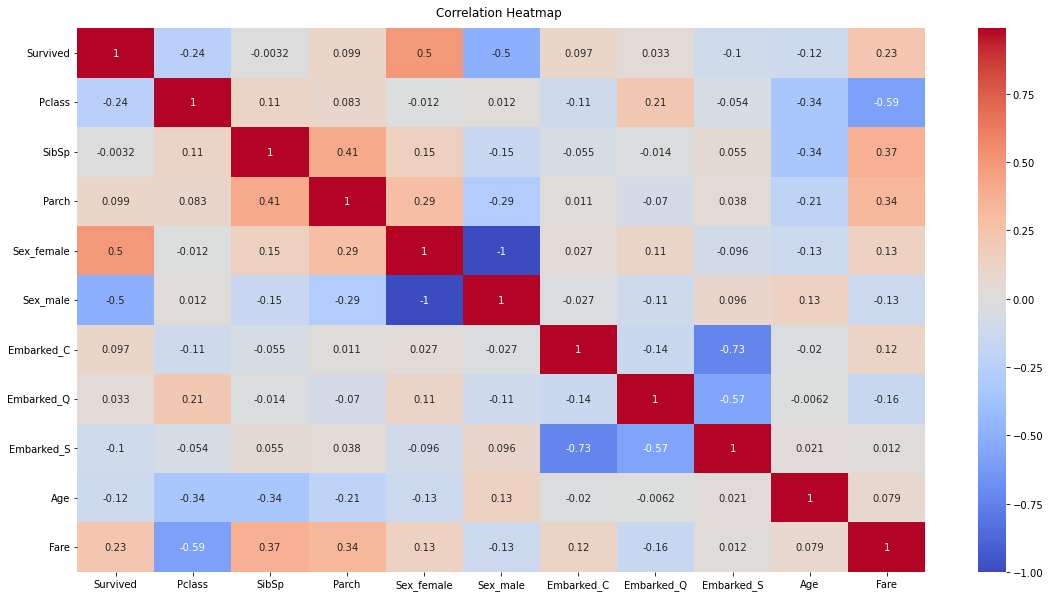

In [132]:
plt.figure(figsize=(19, 10))
heatmap = sns.heatmap(df_train.corr(),
                      vmin=-1,
                      vmax=0.99,
                      annot=True,
                      cmap='coolwarm')
heatmap.set_title('Correlation Heatmap ', fontdict={'fontsize': 12}, pad=12)

From a statistical correlation point of view, there is no feature that really stands out.

## Applying Random Forest

In [133]:
rand_forest

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=800,
                       random_state=42)

In [134]:
feat_importance = rand_forest.feature_importances_
feat_importance

array([0.08015041, 0.0397264 , 0.03497696, 0.12148867, 0.2013132 ,
       0.02225636, 0.01319299, 0.03948366, 0.22136848, 0.22604288])

In [135]:
feat_list = df_train.columns.to_list()
feat_list = feat_list[1:]
feat_list

['Pclass',
 'SibSp',
 'Parch',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age',
 'Fare']

In [136]:
# making importances relative to max importance
feature_importance = 100.0 * (feat_importance / feat_importance.max())

feature_importance

array([ 35.4580557 ,  17.57471839,  15.47359264,  53.74584933,
        89.0597359 ,   9.8460765 ,   5.83649917,  17.46733142,
        97.93207244, 100.        ])

Created a little dataframe to visualise the results 

In [137]:
random_forest_feat_impo = pd.DataFrame({
    "Features":
    feat_list,
    "Feature Importance %":
    feature_importance
}).sort_values(by=['Feature Importance %'],
               ascending=False).reset_index(drop=True)
random_forest_feat_impo

Features  Feature Importance %
0        Fare            100.000000
1         Age             97.932072
2    Sex_male             89.059736
3  Sex_female             53.745849
4      Pclass             35.458056
5       SibSp             17.574718
6  Embarked_S             17.467331
7       Parch             15.473593
8  Embarked_C              9.846077
9  Embarked_Q              5.836499

<AxesSubplot:xlabel='Feature Importance - Random Forest'>

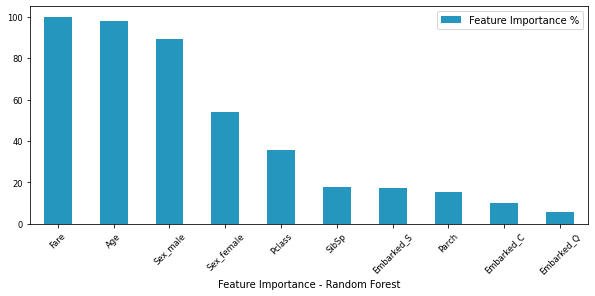

In [138]:
random_forest_feat_impo.plot.bar(x='Features',
                                 rot=45,
                                 color=["#2596be"],
                                 figsize=(10, 4),
                                 xlabel="Feature Importance - Random Forest",
                                 fontsize='small')

## Filtering Datasets

### Train

In [139]:
filtered_df = df_train[["Age", "Sex_male", "Fare", "Survived"]]
filtered_df

Age  Sex_male      Fare  Survived
0   -0.556219         1 -0.779117         0
1   -0.243027         0 -0.729373         1
2    0.461654         0  2.599828         1
3    0.461654         1 -0.720161         0
4    0.046606         1 -0.690071         0
..        ...       ...       ...       ...
770 -0.164729         1 -0.355367         0
771 -0.791112         0  0.897459         1
772  0.046606         0  0.414752         0
773 -0.243027         1  0.897459         1
774  0.226760         1 -0.742269         0

[775 rows x 4 columns]

In [140]:
filtered_df.Survived.value_counts()

0    512
1    263
Name: Survived, dtype: int64

### Unknown

In [141]:
df_unknown

Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3      0      0           0         1           0           1   
1         3      1      0           1         0           0           0   
2         2      0      0           0         1           0           1   
3         3      0      0           0         1           0           0   
4         3      1      1           1         0           0           0   
..      ...    ...    ...         ...       ...         ...         ...   
358       3      0      0           1         0           0           0   
359       3      0      0           0         1           0           0   
360       3      0      0           0         1           0           0   
361       3      0      0           0         1           0           0   
362       3      1      1           0         1           1           0   

     Embarked_S       Age      Fare  
0             0  0.507920 -0.729930  
1             1  1.610444 -0.787682  
2             0  2.933473 -0.600505  
3             1 -0.153594 -0.671893  
4             1 -0.594604 -0.419422  
..          ...       ...       ...  
358           1 -0.065392 -0.733705  
359           1  0.135055 -0.714552  
360           1  0.860728 -0.770270  
361           1  0.135055 -0.714552  
362           0  0.135055  0.281980  

[363 rows x 10 columns]

In [142]:
filtered_unknown = df_unknown[["Age", "Sex_male", "Fare"]]

In [143]:
filtered_unknown

Age  Sex_male      Fare
0    0.507920         1 -0.729930
1    1.610444         0 -0.787682
2    2.933473         1 -0.600505
3   -0.153594         1 -0.671893
4   -0.594604         0 -0.419422
..        ...       ...       ...
358 -0.065392         0 -0.733705
359  0.135055         1 -0.714552
360  0.860728         1 -0.770270
361  0.135055         1 -0.714552
362  0.135055         1  0.281980

[363 rows x 3 columns]

# Testing with the selected variables 

In [144]:
X_ = filtered_df.drop("Survived", axis=1)
Y_ = filtered_df.Survived

In [145]:
_X_train, _X_test, _y_train, _y_test = train_test_split(X_,
                                                        Y_,
                                                        test_size=0.33,
                                                        random_state=42)

In [148]:
smote = SMOTE(random_state =7)
_X_sm, _y_sm = smote.fit_resample(_X_train, _y_train)


In [149]:
print('\nBefore OVER-sampling\n', Y_.value_counts())
print('\nAfter OVER-sampling\n', _y_sm.value_counts())


Before OVER-sampling
 0    512
1    263
Name: Survived, dtype: int64

After OVER-sampling
 0    345
1    345
Name: Survived, dtype: int64


In [150]:
Base_model_ = BasedModels(_X_sm, _y_sm,'roc_auc',models)

LR: roc_auc = 0.816975 (std = 0.042875)
KNN: roc_auc = 0.814202 (std = 0.048438)
CART: roc_auc = 0.778277 (std = 0.044646)
SVM: roc_auc = 0.807647 (std = 0.051510)
RF: roc_auc = 0.876597 (std = 0.045157)


Just to confirm... RF is THE BEST

In [151]:
rand_forest_ = RandomForestClassifier(max_depth=30,
                                     min_samples_split=5,
                                     n_estimators=800,
                                     random_state=42)

rand_forest_.fit(_X_sm, _y_sm)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=800,
                       random_state=42)

In [152]:
Clf_metrics(rand_forest_, _X_sm, _y_sm, _X_test, _y_test)


Summary of the Metrics


Accuracy  Precision    Recall        f1
Train  0.801449   0.803855  0.801092  0.800861
test   0.769531   0.748854  0.763002  0.753649

In [153]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=883, n_estimators=400, random_state=33)

In [154]:
rand_forest_ = RandomForestClassifier(max_depth=883,
                                     min_samples_split=5,
                                     n_estimators=400,
                                     random_state=33)

rand_forest_.fit(_X_sm, _y_sm)

RandomForestClassifier(max_depth=883, min_samples_split=5, n_estimators=400,
                       random_state=33)

In [155]:
Clf_metrics(rand_forest_, _X_sm, _y_sm, _X_test, _y_test)


Summary of the Metrics


Accuracy  Precision    Recall        f1
Train  0.802899   0.805679  0.802563  0.802229
test   0.781250   0.761470  0.777232  0.766667

This is our **best result** overall! :D

## AUC-ROC

In [159]:
probs = rand_forest_.predict_proba(_X_test)
probs[:,1] #pred  for class 1 (quality)
fpr, tpr, thresholds = metrics.roc_curve(_y_test, probs[:,1])

In [160]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

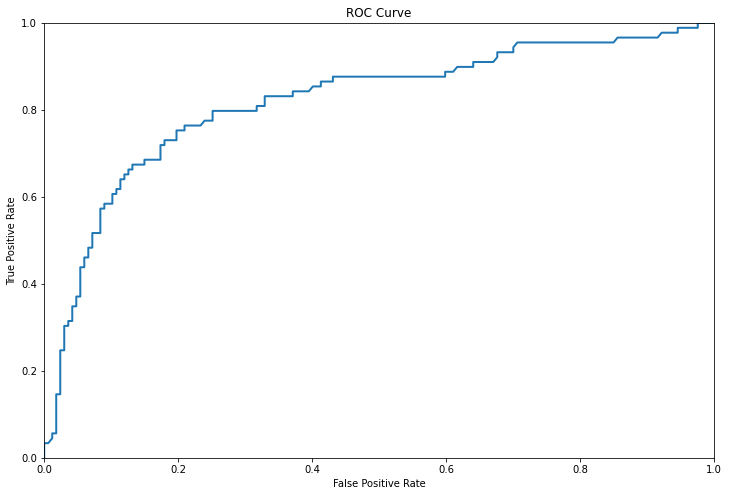

In [161]:
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [164]:
y_pred_ = rand_forest_.predict(_X_test)

In [165]:
roc_auc_score(_y_test, y_pred_)

0.7772320527484358

## Hypertuning 3

In [166]:
params = {"max_depth":list(range(1, 200,20)), 
    "min_samples_split":list(range(1,20,2)),
         "n_estimators":[6,12,25,100,500,1000,1500]}

In [167]:
#instantiate the model
RF2 = RandomForestClassifier(random_state=33)

#find best parameters
grid = GridSearchCV(RF2,params,scoring="roc_auc", n_jobs=-1, verbose=1, cv=10)

In [168]:
%%time
grid.fit(_X_sm,_y_sm)

Fitting 10 folds for each of 700 candidates, totalling 7000 fits
CPU times: total: 20.3 s
Wall time: 6min 49s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=33),
             n_jobs=-1,
             param_grid={'max_depth': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                       181],
                         'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                               19],
                         'n_estimators': [6, 12, 25, 100, 500, 1000, 1500]},
             scoring='roc_auc', verbose=1)

In [169]:
grid.best_params_

{'max_depth': 21, 'min_samples_split': 5, 'n_estimators': 1000}

In [170]:
RF2 = RandomForestClassifier(max_depth=21, min_samples_split=5, n_estimators=1000)

RF2.fit(_X_sm,_y_sm)

RandomForestClassifier(max_depth=21, min_samples_split=5, n_estimators=1000)

In [171]:
Clf_metrics(RF2,_X_sm,_y_sm,_X_test,_y_test)


Summary of the Metrics


Accuracy  Precision    Recall        f1
Train  0.805797   0.809032  0.805420  0.805055
test   0.769531   0.748854  0.763002  0.753649

# Comparing the models

# Making our predictions

In [172]:
filtered_unknown

Age  Sex_male      Fare
0    0.507920         1 -0.729930
1    1.610444         0 -0.787682
2    2.933473         1 -0.600505
3   -0.153594         1 -0.671893
4   -0.594604         0 -0.419422
..        ...       ...       ...
358 -0.065392         0 -0.733705
359  0.135055         1 -0.714552
360  0.860728         1 -0.770270
361  0.135055         1 -0.714552
362  0.135055         1  0.281980

[363 rows x 3 columns]

In [173]:
rand_forest_ = RandomForestClassifier(max_depth=883,
                                     min_samples_split=5,
                                     n_estimators=400,
                                     random_state=33)

rand_forest_.fit(_X_sm, _y_sm)

RandomForestClassifier(max_depth=883, min_samples_split=5, n_estimators=400,
                       random_state=33)

In [174]:
ypredfinal = rand_forest_.predict(filtered_unknown)

In [175]:
ypredfinal

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [176]:
filtered_unknown["Survival predictions"] = ypredfinal

In [177]:
filtered_unknown

Age  Sex_male      Fare  Survival predictions
0    0.507920         1 -0.729930                     0
1    1.610444         0 -0.787682                     0
2    2.933473         1 -0.600505                     0
3   -0.153594         1 -0.671893                     0
4   -0.594604         0 -0.419422                     1
..        ...       ...       ...                   ...
358 -0.065392         0 -0.733705                     1
359  0.135055         1 -0.714552                     1
360  0.860728         1 -0.770270                     0
361  0.135055         1 -0.714552                     1
362  0.135055         1  0.281980                     0

[363 rows x 4 columns]

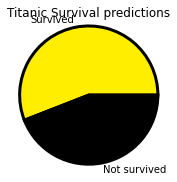

In [178]:
fig = plt.figure()

labels = "Survived", "Not survived"

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(filtered_unknown["Survival predictions"].value_counts(),
        labels=labels,
        radius=1.2,
        colors=["#FFEE00", "black"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 3,
            'linestyle': 'solid',
            'antialiased': True
        })
ax1.title.set_text('Titanic Survival predictions')

plt.show()

# Trying to see what made people more likely to survive

## Gender split

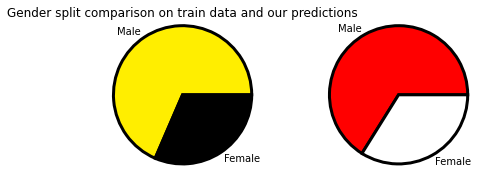

In [179]:
fig = plt.figure()

labels = "Male", "Female"

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(filtered_df["Sex_male"].value_counts(),
        labels=labels,
        radius=1.2,
        colors=["#FFEE00", "black"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 3,
            'linestyle': 'solid',
            'antialiased': True
        })
ax1.title.set_text('Gender split comparison on train data and our predictions')
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(filtered_unknown["Sex_male"].value_counts(),
        labels=labels,
        radius=1.2,
        colors=["red", "white"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 3,
            'linestyle': 'solid',
            'antialiased': True
        })
plt.show()

In [180]:
filtered_df["Sex_male"].value_counts()


1    531
0    244
Name: Sex_male, dtype: int64

In [181]:
filtered_unknown["Sex_male"].value_counts()

1    240
0    123
Name: Sex_male, dtype: int64

## Fare difference

(array([ 22., 364., 127.,  52., 116.,  21.,  18.,  15.,  33.,   7.]),
 array([-1.31341051, -0.8343888 , -0.3553671 ,  0.12365461,  0.60267632,
         1.08169802,  1.56071973,  2.03974144,  2.51876314,  2.99778485,
         3.47680655]),
 <BarContainer object of 10 artists>)

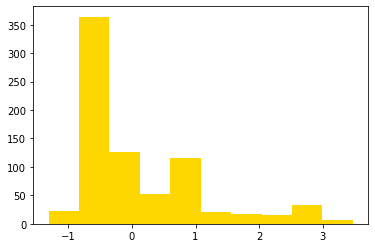

In [182]:
plt.hist(filtered_df.Fare, color="gold")

(array([  6., 170.,  61.,  30.,  50.,   7.,   9.,   9.,   9.,  12.]),
 array([-1.27521212, -0.82250546, -0.36979879,  0.08290787,  0.53561453,
         0.9883212 ,  1.44102786,  1.89373452,  2.34644119,  2.79914785,
         3.25185451]),
 <BarContainer object of 10 artists>)

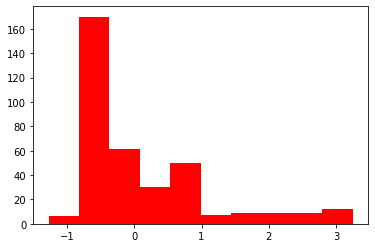

In [183]:
plt.hist(filtered_unknown.Fare, color="red")

## Age distribution

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

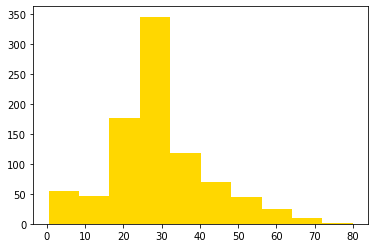

In [184]:
plt.hist(titanic_train.Age, color="gold")

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

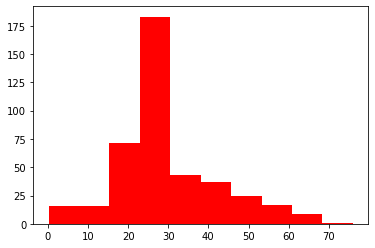

In [185]:
plt.hist(titanic_unknown.Age, color="red")

# Conclusion

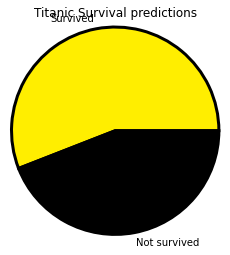

In [186]:
fig = plt.figure(figsize=(8, 6))

labels = "Survived", "Not survived"

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(filtered_unknown["Survival predictions"].value_counts(),
        labels=labels,
        radius=1.2,
        colors=["#FFEE00", "black"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 3,
            'linestyle': 'solid',
            'antialiased': True
        })
plt.title('Titanic Survival predictions')

plt.show()

In [187]:
filtered_unknown["Survival predictions"].value_counts()

0    203
1    160
Name: Survival predictions, dtype: int64

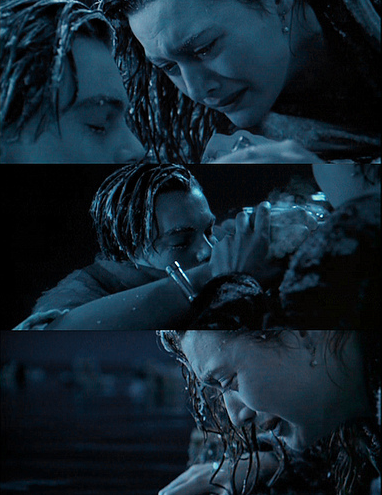

In [158]:
# thanks :) 